In [2]:
# for numerical computing
import numpy as np

# for dataframes
import pandas as pd

# for easier visualization
import seaborn as sns

# for visualization and to display plots
from matplotlib import pyplot as plt
%matplotlib inline

# import color maps
from matplotlib.colors import ListedColormap

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

from math import sqrt

# to split train and test set
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# to perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import cross_val_score

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score
import xgboost
import os
from xgboost import XGBClassifier
from xgboost import plot_importance  # to plot feature importance

import joblib
sns.set()
plt.style.use('ggplot')
%matplotlib inline

In [3]:
#import dataset
df = pd.read_csv('C:/Users\ADITYA/Desktop/predMOdel/indian_liver_patient.csv')       
df.head(10)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


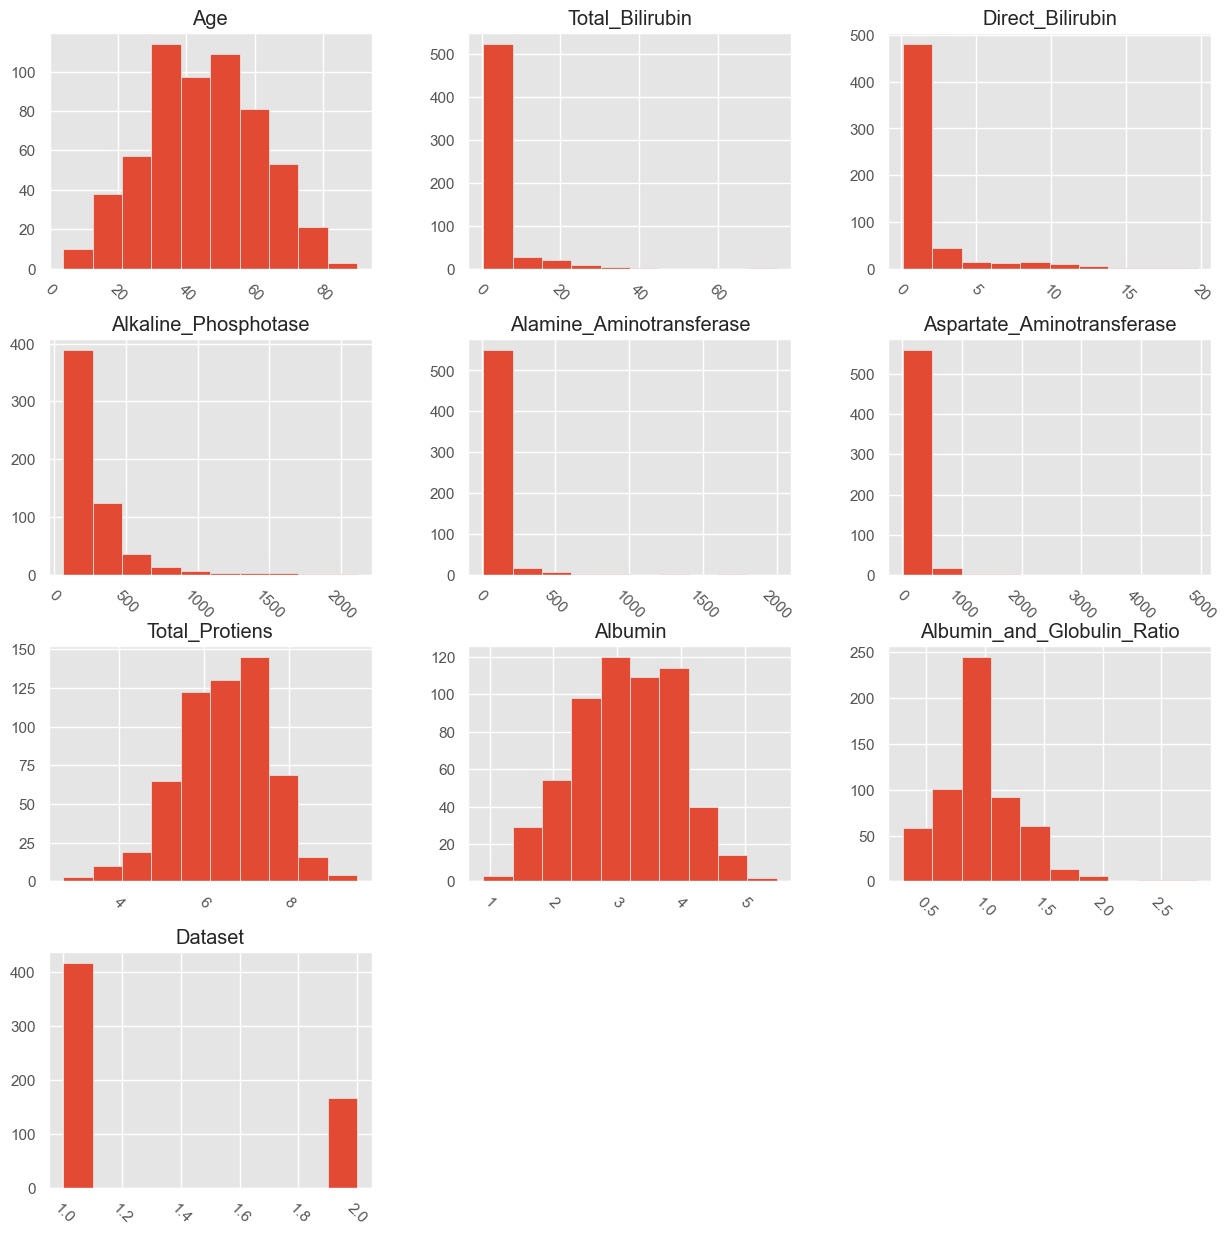

In [4]:
df.hist(figsize=(15,15), xrot=-45, bins=10) ## Display the labels rotated by 45 degress

# Clear the text "residue"
plt.show()


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [6]:
def partition(x):
    if x == 2:
        return 0
    return 1

df['Dataset'] = df['Dataset'].map(partition)

In [7]:
df.describe(include=['object'])

,Gender
count,583
unique,2
top,Male
freq,441


In [14]:
df.var()

Age                             262.110702
Total_Bilirubin                  38.558160
Direct_Bilirubin                  7.887659
Alkaline_Phosphotase          59018.866587
Alamine_Aminotransferase      33350.194438
Aspartate_Aminotransferase    83473.916429
Total_Protiens                    1.178205
Albumin                           0.632850
Albumin_and_Globulin_Ratio        0.102139
Dataset                           0.204747
dtype: float64

Number of patients that are male:  441
Number of patients that are female:  142


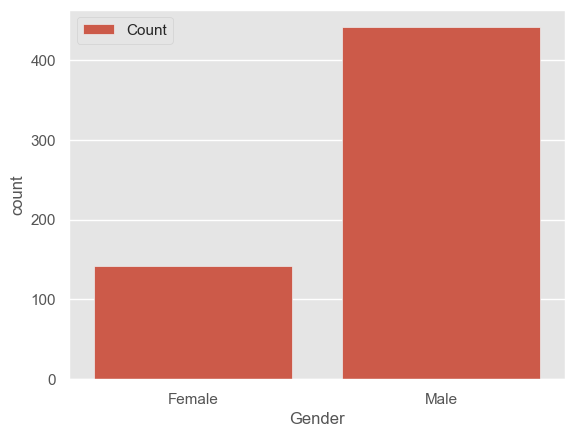

In [8]:
sns.countplot(data=df, x = 'Gender', label='Count')

M, F = df['Gender'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)

In [9]:
def partition(x):
    if x =='Male':
        return 0
    return 1

df['Gender'] = df['Gender'].map(partition)

In [10]:
df = df.drop_duplicates()
print( df.shape )

(570, 11)


<Axes: ylabel='Aspartate_Aminotransferase'>

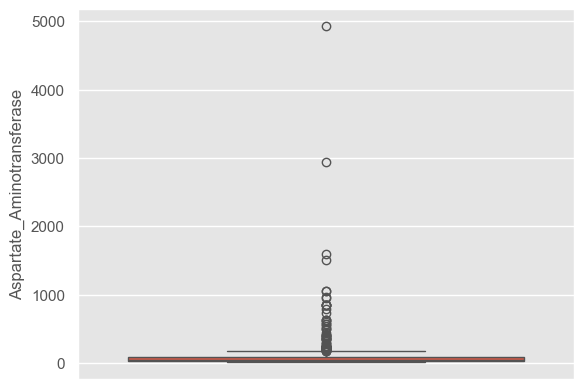

In [11]:
sns.boxplot(df.Aspartate_Aminotransferase)

In [12]:
df.Aspartate_Aminotransferase.sort_values(ascending=False).head()

135    4929
117    2946
118    1600
207    1500
199    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [13]:
df = df[df.Aspartate_Aminotransferase <=3000 ]
df.shape

(569, 11)

<Axes: ylabel='Aspartate_Aminotransferase'>

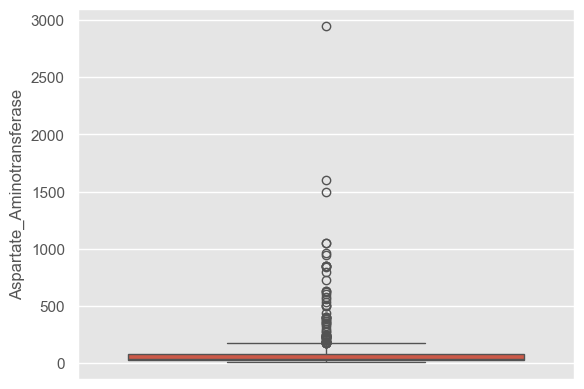

In [14]:
sns.boxplot(df.Aspartate_Aminotransferase)

In [15]:
df.Aspartate_Aminotransferase.sort_values(ascending=False).head()

117    2946
118    1600
207    1500
119    1050
199    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [16]:
df = df[df.Aspartate_Aminotransferase <=2500 ]
df.shape

(568, 11)

In [17]:
df.isnull().values.any()

True

In [18]:
df=df.dropna(how='any') 

In [19]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [20]:
y = df.Dataset

# Create separate object for input features
X = df.drop('Dataset', axis=1)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=0,
                                                    stratify=df.Dataset)

In [22]:
train_mean = X_train.mean()
train_std = X_train.std()

In [23]:
X_train = (X_train - train_mean) / train_std

In [24]:
X_train.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,3.940000e+02,3.940000e+02,394.000000,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02
mean,-1.848493e-16,1.127130e-17,0.000000,3.606816e-17,-6.311928e-17,4.508520e-18,2.028834e-17,2.930538e-16,1.284928e-16,-3.606816e-17
std,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.609772e+00,-5.473278e-01,-0.457097,-4.967282e-01,-9.478507e-01,-3.999413e-01,-4.728145e-01,-3.285639e+00,-2.750957e+00,-2.057111e+00
25%,-7.944028e-01,-5.473278e-01,-0.396929,-4.623568e-01,-4.750931e-01,-3.207875e-01,-3.922670e-01,-7.312226e-01,-7.405196e-01,-7.644963e-01
50%,1.938343e-02,-5.473278e-01,-0.366846,-4.279853e-01,-3.294669e-01,-2.477225e-01,-3.059663e-01,-1.389277e-03,-1.122579e-01,7.570326e-02
75%,7.705707e-01,-5.473278e-01,-0.111134,-8.427106e-02,4.409605e-02,-9.702594e-02,-7.583080e-02,6.372149e-01,7.673084e-01,5.281184e-01
max,2.460742e+00,1.822421e+00,10.764128,6.240071e+00,7.692639e+00,9.768272e+00,8.669316e+00,2.826715e+00,2.400789e+00,5.052270e+00


In [25]:
X_test = (X_test - train_mean) / train_std

In [26]:
X_test.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,-0.169886,0.107838,-0.065212,-0.062637,0.052364,-0.020612,0.059915,0.284104,0.238829,0.124366
std,1.053615,1.063007,0.800553,0.912979,1.097240,0.818079,0.976194,0.950912,0.985593,1.100236
min,-2.484574,-0.547328,-0.442055,-0.496728,-0.833882,-0.393853,-0.478568,-3.376868,-2.750957,-2.057111
25%,-0.857002,-0.547328,-0.396929,-0.462357,-0.457154,-0.320788,-0.386514,-0.275077,-0.363563,-0.489816
50%,-0.074515,-0.547328,-0.381888,-0.427985,-0.346351,-0.247723,-0.294459,0.454757,0.264699,-0.118189
75%,0.582774,1.822421,-0.216427,-0.170200,0.044096,-0.090937,-0.006790,0.819673,1.018613,0.770484
max,2.773737,1.822421,3.649330,3.868443,6.173061,7.150109,5.504954,2.917944,3.029050,6.021731


In [27]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [28]:
y_pred = lr.predict(X_test)

In [29]:
print(accuracy_score(y_train, lr.predict(X_train)))

lr_acc = accuracy_score(y_test, lr.predict(X_test))
print(lr_acc)

0.7208121827411168
0.6941176470588235


In [30]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_train, knn.predict(X_train)))
knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(knn_acc)


0.7944162436548223
0.6294117647058823


In [31]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN'],
    'Score': [100*round(lr_acc,4), 100*round(knn_acc,4)]
})
models.sort_values(by = 'Score', ascending = False)

,Model,Score
0,Logistic Regression,69.41
1,KNN,62.94


In [ ]:
import pickle
model = lr
pickle.dump(model, open("models/liver.pkl",'wb'))